In [1]:
#!pip install graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
fd=pd.read_csv("music.csv")

In [3]:
fd.shape # Access shape as an attribute

(18, 3)

In [4]:
fd.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [5]:
fd.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [6]:
fd.values

array([[20, 1, 'HipHop'],
       [23, 1, 'HipHop'],
       [25, 1, 'HipHop'],
       [26, 1, 'Jazz'],
       [29, 1, 'Jazz'],
       [30, 1, 'Jazz'],
       [31, 1, 'Classical'],
       [33, 1, 'Classical'],
       [37, 1, 'Classical'],
       [20, 0, 'Dance'],
       [21, 0, 'Dance'],
       [25, 0, 'Dance'],
       [26, 0, 'Acoustic'],
       [27, 0, 'Acoustic'],
       [30, 0, 'Acoustic'],
       [31, 0, 'Classical'],
       [34, 0, 'Classical'],
       [35, 0, 'Classical']], dtype=object)

In [7]:
X=fd.drop(columns=["genre"])

In [8]:
y=fd["genre"]

In [9]:
model=DecisionTreeClassifier()
model.fit(X.values,y)
joblib.dump(model,"music-data.joblib")

['music-data.joblib']

In [10]:
pre=model.predict([[21,1],[22,0]])
pre


array(['HipHop', 'Dance'], dtype=object)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train,X_test,y_train,y_test)

    age  gender
8    37       1
12   26       0
13   27       0
2    25       1
9    20       0
1    23       1
7    33       1
10   21       0
16   34       0
6    31       1
11   25       0
5    30       1
14   30       0
3    26       1     age  gender
17   35       0
0    20       1
15   31       0
4    29       1 8     Classical
12     Acoustic
13     Acoustic
2        HipHop
9         Dance
1        HipHop
7     Classical
10        Dance
16    Classical
6     Classical
11        Dance
5          Jazz
14     Acoustic
3          Jazz
Name: genre, dtype: object 17    Classical
0        HipHop
15    Classical
4          Jazz
Name: genre, dtype: object


In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pre=model.predict(X_test)
pre

array(['Classical', 'HipHop', 'Acoustic', 'HipHop'], dtype=object)

In [ ]:
rate = accuracy_score(y_test,pre)
rate

0.75

In [19]:
model = joblib.load("music-data.joblib")
pre = model.predict([[21,1]])
pre

array(['HipHop'], dtype=object)

In [15]:
tree.export_graphviz(model,out_file="music-data.dot",feature_names=["age","gender"],class_names=sorted(y.unique()),label="all",rounded=True,filled=True)


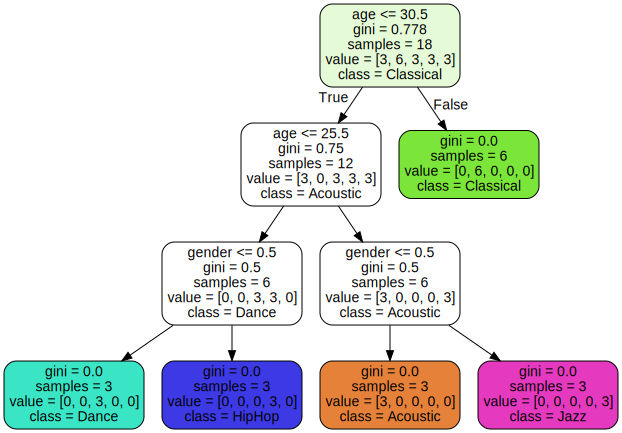

In [23]:
with open("music-data.dot", "r") as f:
    dot_data = f.read()

graph = graphviz.Source(dot_data)
graph

In [55]:
with open("music-data.dot", "r") as f:
    dot_data = f.read()

print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="age <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]\nclass = Classical", fillcolor="#e5fad7"] ;
1 [label="age <= 25.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]\nclass = Acoustic", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 3, 3, 0]\nclass = Dance", fillcolor="#ffffff"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance", fillcolor="#39e5c5"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop", fillcolor="#3c39e5"] ;
2 -> 4 ;
5 [label="gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 0, 0, 3]\nclass = Acoustic", fillcolor="#ffffff"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic", fillcolor="#e58139"] ;
5 -> 6 ;

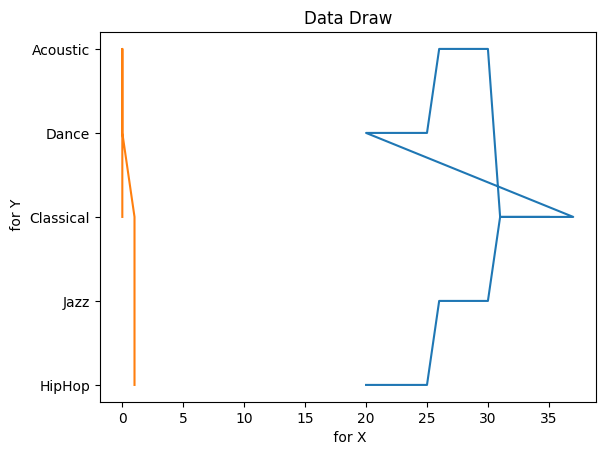

In [16]:
plt.plot(X, y)
plt.title("Data Draw")
plt.xlabel(" for X")
plt.ylabel(" for Y")
plt.show()

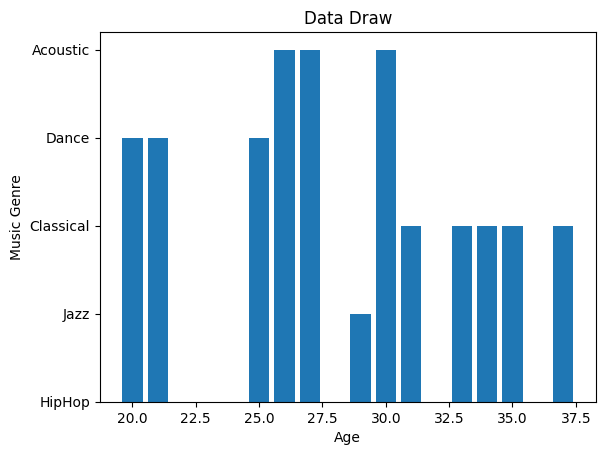

In [17]:
x_values = X['age']  # or X['gender'], depending on what you want to plot against

plt.bar(x_values, y)
plt.title("Data Draw")
plt.xlabel("Age")  # or "Gender", depending on the column you chose
plt.ylabel("Music Genre")
plt.show()

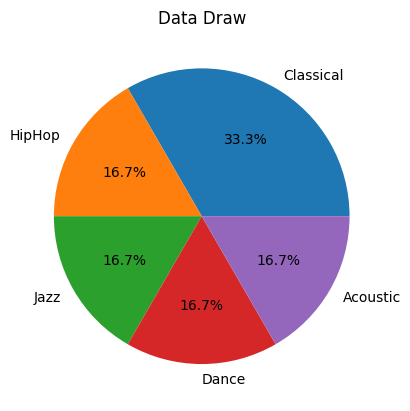

In [18]:
# Assuming 'y' is your data for the pie chart,
# you need to calculate the sizes for each category.
# For example, if 'y' represents music genres,
# you can get the sizes using:
sizes = y.value_counts()

# Get the labels for the pie chart (e.g., music genres)
labels = sizes.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Data Draw")
plt.show()

In [19]:
arr=np.array(y)
print(arr)

['HipHop' 'HipHop' 'HipHop' 'Jazz' 'Jazz' 'Jazz' 'Classical' 'Classical'
 'Classical' 'Dance' 'Dance' 'Dance' 'Acoustic' 'Acoustic' 'Acoustic'
 'Classical' 'Classical' 'Classical']


In [20]:
arr_2d = np.array(y).reshape(-1, 1)
print(arr_2d)

[['HipHop']
 ['HipHop']
 ['HipHop']
 ['Jazz']
 ['Jazz']
 ['Jazz']
 ['Classical']
 ['Classical']
 ['Classical']
 ['Dance']
 ['Dance']
 ['Dance']
 ['Acoustic']
 ['Acoustic']
 ['Acoustic']
 ['Classical']
 ['Classical']
 ['Classical']]


In [21]:
zeros = np.zeros((arr_2d.shape[0], 1))
print(zeros)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [22]:
ones = np.ones((arr_2d.shape[0], 1))
print(ones)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [23]:
random_array = np.random.rand(arr_2d.shape[0], 1)
print(random_array)

[[0.99074845]
 [0.24643459]
 [0.44110237]
 [0.29525634]
 [0.84005342]
 [0.95389136]
 [0.8028842 ]
 [0.71430352]
 [0.55094163]
 [0.24616513]
 [0.32987934]
 [0.13798211]
 [0.41732896]
 [0.60618235]
 [0.48504375]
 [0.35732391]
 [0.53257455]
 [0.70943744]]


In [24]:
sum_all = zeros + ones + random_array
print(sum_all)

[[1.99074845]
 [1.24643459]
 [1.44110237]
 [1.29525634]
 [1.84005342]
 [1.95389136]
 [1.8028842 ]
 [1.71430352]
 [1.55094163]
 [1.24616513]
 [1.32987934]
 [1.13798211]
 [1.41732896]
 [1.60618235]
 [1.48504375]
 [1.35732391]
 [1.53257455]
 [1.70943744]]


In [25]:
max_value = np.max(sum_all)
print(max_value)

1.9907484479225057


In [26]:
mean_value = np.mean(sum_all)
print(mean_value)

1.5365296354987983


In [27]:
reshaped_array = sum_all.reshape(1, -1)
print(reshaped_array)

[[1.99074845 1.24643459 1.44110237 1.29525634 1.84005342 1.95389136
  1.8028842  1.71430352 1.55094163 1.24616513 1.32987934 1.13798211
  1.41732896 1.60618235 1.48504375 1.35732391 1.53257455 1.70943744]]


In [28]:
first_element=sum_all[0]
print(first_element)

[1.99074845]


In [29]:
first_row=sum_all[0,:]
print(first_row)

[1.99074845]
